Formação Cientista de Dados
Limpeza e tratamento de Dados

1- Importação de Bibliotecas necessárias
2- Importação de Dados(csv)
3- Atribuindo Nomes para cada coluna
4- Exploração de Dados Categóricos (estados - genero) - agrupamento e plot.bar( gráfico de Barra)
5- Exploração de Dados Numéricos ( score - idade - saldo -salário - ) - boxplot e distplot (gráfico de caixa e densidade sobreposta ao histograma - Biblioteca Seaborn)
6- Localização de NAs(valores não preenchidos) - genero e salario (isnull().sum())
7- Subtituindo NAs por Mediana. Por meio de atribuir a todo valor NA (fillna) o valor da mediana, não somente o retorno, mas no próprio conjunto de dados(inplace = True)
8- Padronização dos dados na coluna genero 
9- Tratamento de Dados outliers em idade (Idade negativa e Idade maior que 120), Igualando a mediana
10- Excluindo dados duplicados (drop_duplicates), mantendo o primeiro (keep = 'first') com inplace = True
11- Tratando dados fora de dominio em Estado, substituindo pela moda
12- Tratando dados com outliers, Salário com valores que divergem de 2 desvios padrões serão substituidos pela mediana (outliers em salário, vamos considerar 2 desvios padrão)


In [ ]:
# Importação das Bibliotecas,dando a elas "apelidos"
import pandas as pd
import seaborn as srn
import statistics  as sts

In [7]:
#importar dados
dataset = pd.read_csv(r"Churn.csv", sep=";")
#visulizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
#tamanho
dataset.shape

(999, 12)

In [8]:
#primeiro problema é dar nomes as colunas
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

In [ ]:
#visulizar
dataset.head()

In [9]:
#explorar dados categoricos
#estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

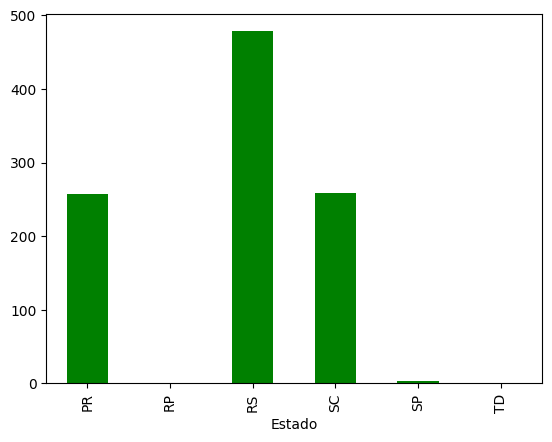

In [10]:
agrupado.plot.bar(color='green')

In [ ]:
#genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

In [ ]:
agrupado.plot.bar(color = 'gray')

In [11]:
#explorar colunas numéricas
#score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

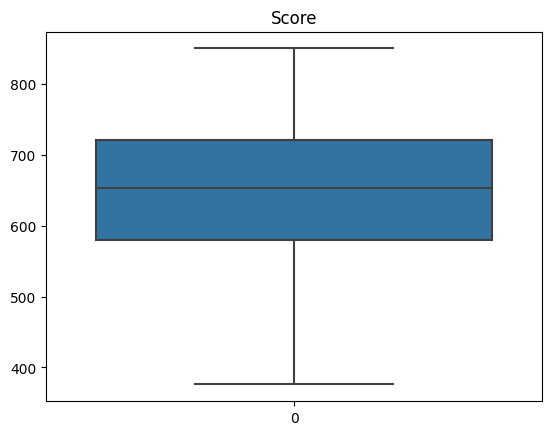

In [12]:
srn.boxplot(dataset['Score']).set_title('Score')

C:\Users\ramon\AppData\Local\Temp\ipykernel_21592\4068248596.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Score']).set_title('Score')


Text(0.5, 1.0, 'Score')

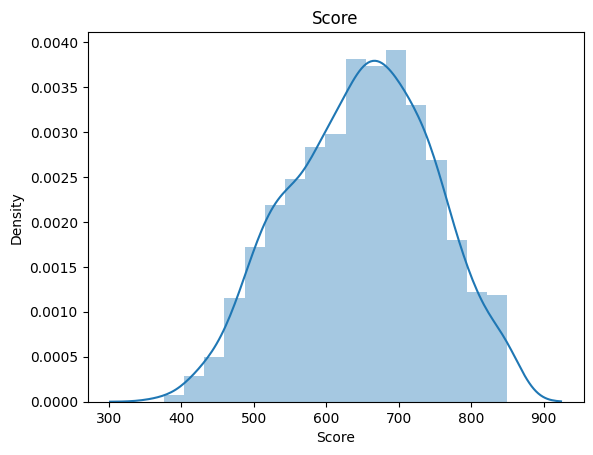

In [13]:
srn.distplot(dataset['Score']).set_title('Score')

In [ ]:
#idade
dataset['Idade'].describe()

In [ ]:
srn.boxplot(dataset['Idade']).set_title('Idade')

In [ ]:
srn.distplot(dataset['Idade']).set_title('Idade')

In [ ]:
#saldo
dataset['Saldo'].describe()

In [ ]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

In [ ]:
srn.distplot(dataset['Saldo']).set_title('Saldo')

In [ ]:
#salário
dataset['Salario'].describe()

In [ ]:
srn.boxplot(dataset['Salario']).set_title('Salario')

In [ ]:
srn.distplot(dataset['Salario']).set_title('Salario')

In [14]:
#contamos valores NAN
#genero e salário
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [ ]:
#salarios
#remover nas e substiutir pela mediana
dataset['Salario'].describe()

In [ ]:
mediana = sts.median(dataset['Salario']) #Statistics mediana
mediana

In [ ]:
#substituir NAN por mediana
dataset['Salario'].fillna(mediana, inplace=True) #(Substituir no próprio conjunto de dados, não somente retornará um objeto )

In [ ]:
#Verificamos se NAN não existem mais
dataset['Salario'].isnull().sum()

In [ ]:
#genero, falta de padronização e NAs
agrupado = dataset.groupby(['Genero']).size()
agrupado

In [ ]:
#total de Nas
dataset['Genero'].isnull().sum()

In [ ]:
#preenche NAs com Masculino (moda)
dataset['Genero'].fillna('Masculino', inplace=True)

In [ ]:
#verificamos novamente NANs
dataset['Genero'].isnull().sum()

In [ ]:
#padroniza de acordo com o dominio
dataset.loc[dataset['Genero'] ==  'M', 'Genero'] = "Masculino" #nome.loc retorna uma parte do DataFrame-  estrtura lógica (nome.se(nome(x)) é verdadeiro )
dataset.loc[dataset['Genero'].isin( ['Fem','F']), 'Genero'] = "Feminino" #isin (está em )
#visualiza o resultado
agrupado = dataset.groupby(['Genero']).size()
agrupado

In [ ]:
#idades fora do dominio
dataset['Idade'].describe()

In [ ]:
#visualizar 
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ] # retorna 

In [16]:
#calular a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [17]:
#substituir
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana

In [18]:
#verificamos se ainda existem idades fora do domínio
dataset[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [19]:
#dados duplicados, buscamos pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [20]:
#excluimso pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
#buscamos duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [ ]:
#estado foram do domínio
agrupado = dataset.groupby(['Estado']).size()
agrupado

In [ ]:
#atribuomos RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()

In [ ]:
#verificamos o resultado
agrupado

In [21]:
#outliers em salário, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset['Salario'])
desv

AttributeError: 'float' object has no attribute 'numerator'

In [22]:
#definir padrão como maior que 2 desvios padrão
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

NameError: name 'desv' is not defined

In [23]:
#vamos atualiar salarios para mediana, calculamos
mediana = sts.median(dataset['Salario'])
mediana

73752.0

In [24]:
#atribumos
dataset.loc[dataset['Salario'] >=  2 * desv, 'Salario'] = mediana
#checamos se algum atende critério
dataset.loc[dataset['Salario'] >=  2 * desv ] 

NameError: name 'desv' is not defined

In [ ]:
dataset.head()

In [ ]:
dataset.shape